# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image


(np.float64(-0.5), np.float64(1499.5), np.float64(1232.5), np.float64(-0.5))

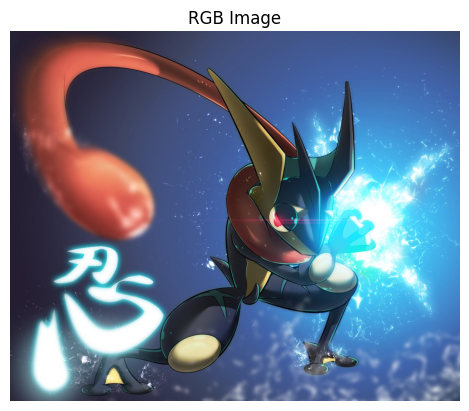

In [2]:
img = Image.open("/content/648582.jpg").convert("RGB")
img_rgb = np.array(img)

plt.imshow(img_rgb)
plt.title("RGB Image")
plt.axis("off")


(np.float64(-0.5), np.float64(1499.5), np.float64(1232.5), np.float64(-0.5))

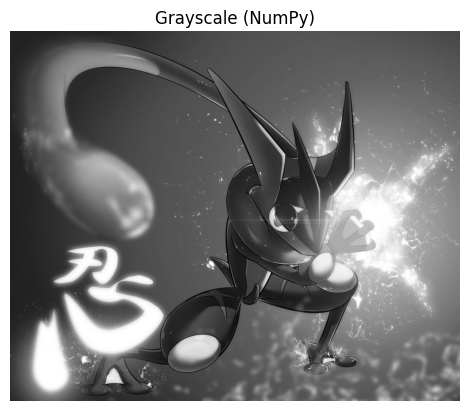

In [3]:
gray_np = (
    0.299 * img_rgb[:, :, 0] +
    0.587 * img_rgb[:, :, 1] +
    0.114 * img_rgb[:, :, 2]
).astype(np.uint8)

plt.imshow(gray_np, cmap="gray")
plt.title("Grayscale (NumPy)")
plt.axis("off")


(np.float64(-0.5), np.float64(1499.5), np.float64(1232.5), np.float64(-0.5))

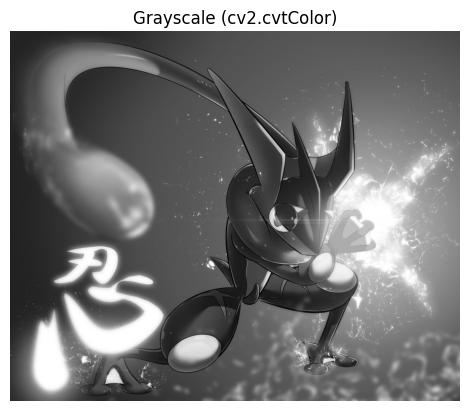

In [4]:
gray_cv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.imshow(gray_cv, cmap="gray")
plt.title("Grayscale (cv2.cvtColor)")
plt.axis("off")


In [5]:
print("RGB image shape:", img_rgb.shape)
print("Grayscale (NumPy) shape:", gray_np.shape)
print("Grayscale (cv2) shape:", gray_cv.shape)


RGB image shape: (1233, 1500, 3)
Grayscale (NumPy) shape: (1233, 1500)
Grayscale (cv2) shape: (1233, 1500)


In [6]:
print("RGB pixels (top-left 3x3):")
print(img_rgb[:3, :3])

print("\nGrayscale NumPy pixels (top-left 3x3):")
print(gray_np[:3, :3])

print("\nGrayscale cv2 pixels (top-left 3x3):")
print(gray_cv[:3, :3])


RGB pixels (top-left 3x3):
[[[38 33 53]
  [38 33 53]
  [38 33 53]]

 [[38 33 53]
  [38 33 53]
  [38 33 53]]

 [[38 33 53]
  [38 33 53]
  [38 33 53]]]

Grayscale NumPy pixels (top-left 3x3):
[[36 36 36]
 [36 36 36]
 [36 36 36]]

Grayscale cv2 pixels (top-left 3x3):
[[37 37 37]
 [37 37 37]
 [37 37 37]]


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Compute 2D FFT
f = np.fft.fft2(gray_np)

# Shift zero-frequency component to center
fshift = np.fft.fftshift(f)


In [10]:
# Magnitude spectrum
magnitude = np.abs(fshift)

# Phase spectrum
phase = np.angle(fshift)

# Log scaling for visualization
magnitude_spectrum = np.log(1 + magnitude)


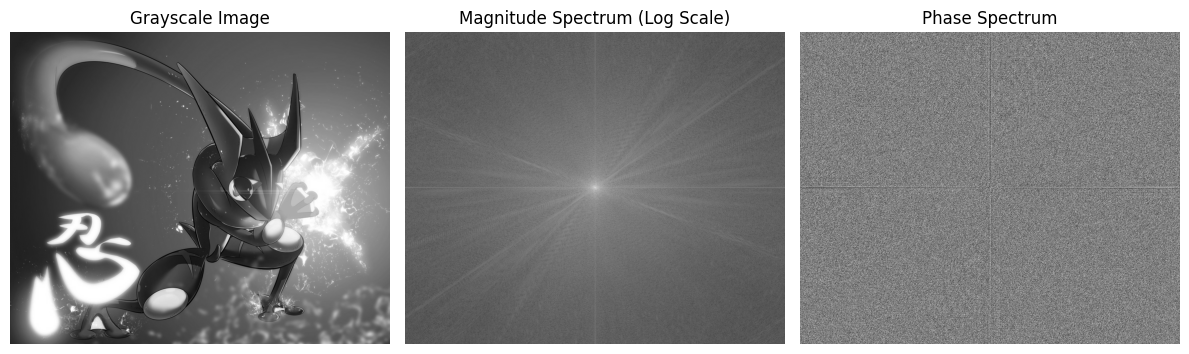

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(gray_np, cmap="gray")
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Magnitude Spectrum (Log Scale)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(phase, cmap="gray")
plt.title("Phase Spectrum")
plt.axis("off")

plt.tight_layout()
plt.show()


## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [12]:
rows, cols = gray_np.shape
crow, ccol = rows // 2, cols // 2

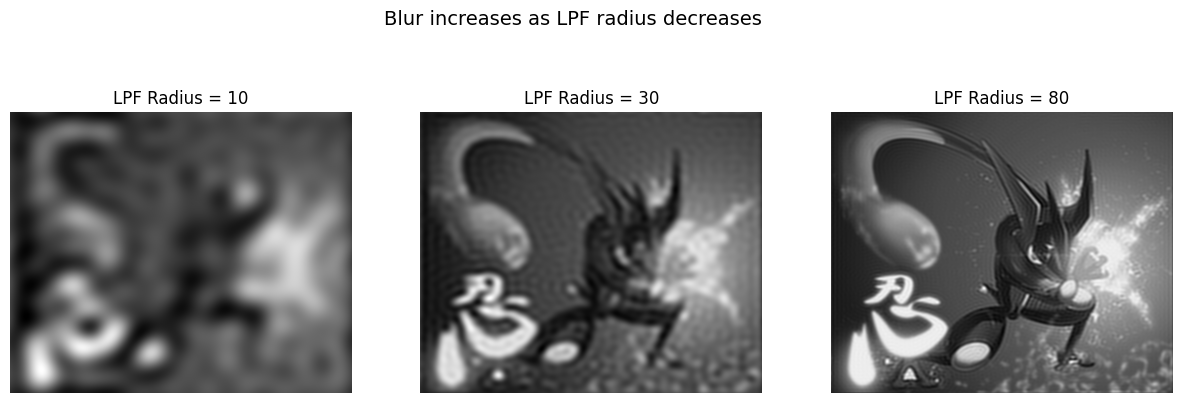

In [13]:
radii = [10, 30, 80]

plt.figure(figsize=(15, 5))

for i, r in enumerate(radii):
    # Create circular LPF mask
    mask = np.zeros((rows, cols), np.uint8)
    for x in range(rows):
        for y in range(cols):
            if (x - crow)**2 + (y - ccol)**2 <= r**2:
                mask[x, y] = 1

    # Apply LPF mask
    fshift_lpf = fshift * mask

    # Reconstruct image
    img_back = np.fft.ifft2(np.fft.ifftshift(fshift_lpf))
    img_back = np.abs(img_back)

    plt.subplot(1, 3, i + 1)
    plt.imshow(img_back, cmap="gray")
    plt.title(f"LPF Radius = {r}")
    plt.axis("off")

plt.suptitle("Blur increases as LPF radius decreases", fontsize=14)
plt.show()


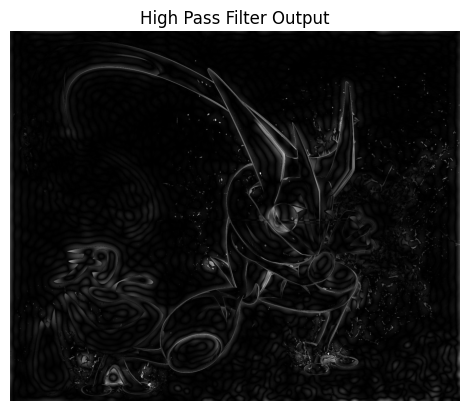

In [14]:
# Create HPF mask (inverse of LPF)
radius = 30
mask_hpf = np.ones((rows, cols), np.uint8)

for x in range(rows):
    for y in range(cols):
        if (x - crow)**2 + (y - ccol)**2 <= radius**2:
            mask_hpf[x, y] = 0

# Apply HPF
fshift_hpf = fshift * mask_hpf

# Reconstruct image
img_hpf = np.fft.ifft2(np.fft.ifftshift(fshift_hpf))
img_hpf = np.abs(img_hpf)

plt.imshow(img_hpf, cmap="gray")
plt.title("High Pass Filter Output")
plt.axis("off")
plt.show()


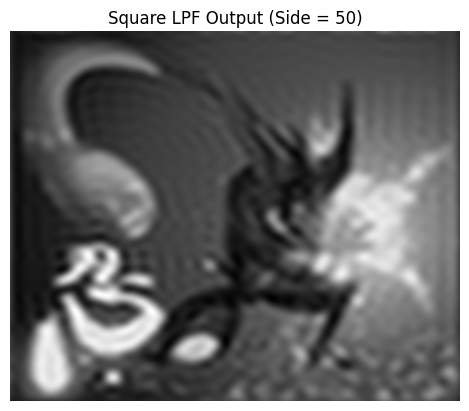

In [15]:
square_size = 50
half = square_size // 2

# Create square LPF mask
square_mask = np.zeros((rows, cols), np.uint8)
square_mask[crow-half:crow+half, ccol-half:ccol+half] = 1

# Apply square LPF
fshift_sq = fshift * square_mask

# Reconstruct image
img_sq = np.fft.ifft2(np.fft.ifftshift(fshift_sq))
img_sq = np.abs(img_sq)

plt.imshow(img_sq, cmap="gray")
plt.title("Square LPF Output (Side = 50)")
plt.axis("off")
plt.show()


## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

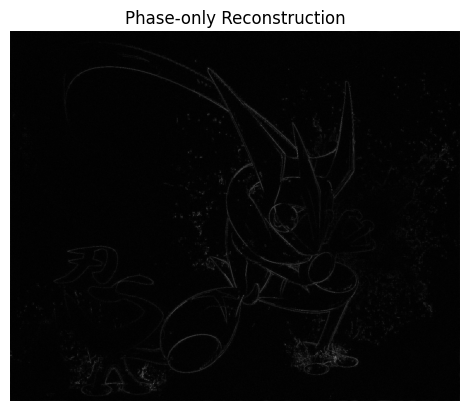

In [16]:
phase_only = fshift / (np.abs(fshift) + 1e-8)  # epsilon avoids division by zero

# Reconstruct image
img_phase = np.fft.ifft2(np.fft.ifftshift(phase_only))
img_phase = np.abs(img_phase)

plt.imshow(img_phase, cmap="gray")
plt.title("Phase-only Reconstruction")
plt.axis("off")
plt.show()

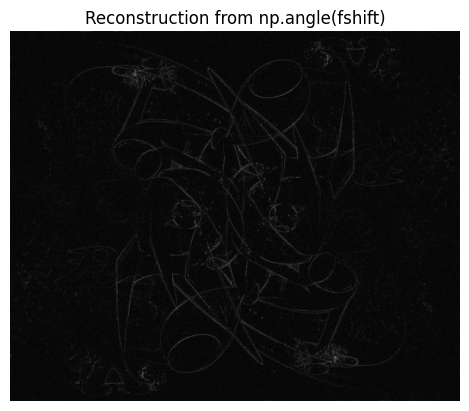

In [17]:
# Attempt reconstruction using only phase angles
phase_angles = np.angle(fshift)

img_from_angle = np.fft.ifft2(np.fft.ifftshift(phase_angles))
img_from_angle = np.abs(img_from_angle)

plt.imshow(img_from_angle, cmap="gray")
plt.title("Reconstruction from np.angle(fshift)")
plt.axis("off")
plt.show()



## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

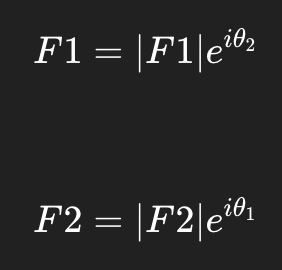

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.